Among the various aspects of time series analysis, the detection of seasonality plays a crucial role in revealing recurring patterns within the data. In this article, we will detect seasonality in time-series data and remove it from the data, which will make the time-series data more suitable for model training.

Why to Detect Seasonality in Time Series Data?
There are some specific reasons which are discussed below:



Pattern Recognition: Seasonality detection allows analysts to recognize and understand recurring patterns within a time series which is valuable for interpreting historical trends and making informed predictions about future behavior.
Forecasting: Seasonal components significantly impact forecasting accuracy. By detecting seasonality, analysts can account for these patterns when building predictive models which leads to more robust and reliable forecasts.
Anomaly Detection: Seasonality detection can help identify anomalies or irregularities in the data. Sudden deviations from the expected seasonal pattern may signal important events or changes that warrant further investigation.
Optimized Decision-Making: Understanding seasonality enables organizations to optimize resource allocation, inventory management and marketing strategies based on anticipated temporal fluctuations in demand or other relevant metrics.

In [69]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose

In [70]:
df=pd.read_csv('Shoe-Sales (1).csv')

In [71]:
df

,YearMonth,Shoe_Sales
0,1980-01,85
1,1980-02,89
2,1980-03,109
3,1980-04,95
4,1980-05,91
...,...,...
182,1995-03,188
183,1995-04,195
184,1995-05,189
185,1995-06,220


In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   YearMonth   187 non-null    object
 1   Shoe_Sales  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 3.0+ KB


<AxesSubplot:title={'center':'Shoe Sales'}, xlabel='YearMonth'>

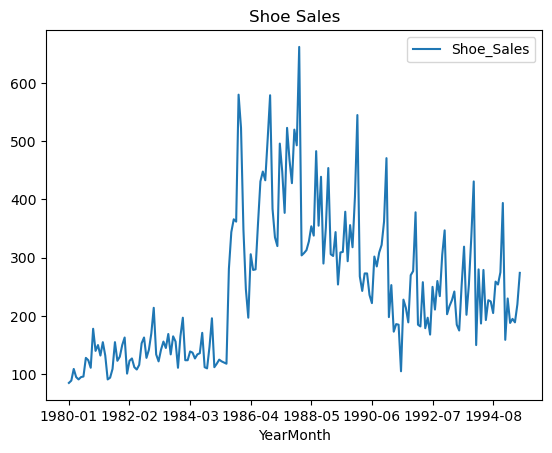

In [73]:
df.plot(x='YearMonth',y='Shoe_Sales',title="Shoe Sales")

In [74]:
df_seasonal_decompose=seasonal_decompose(df,model='multiplicative')

ValueError: could not convert string to float: '1980-01'

I didnot change the datatype

In [75]:
df['YearMonth']=pd.to_datetime(df['YearMonth'])

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   YearMonth   187 non-null    datetime64[ns]
 1   Shoe_Sales  187 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 3.0 KB


In [77]:
df_seasonal_decompose=seasonal_decompose(df,model='multiplicative')

TypeError: float() argument must be a string or a number, not 'Timestamp'

I only need Shoe Sales Column

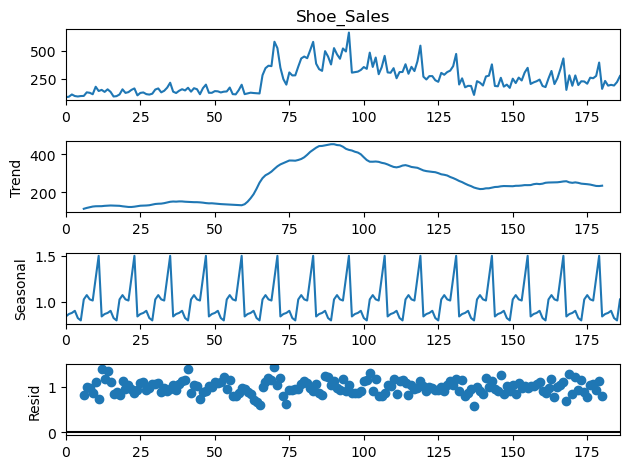

In [92]:
df_seasonal_decompose=seasonal_decompose(df['Shoe_Sales'],model='multiplicative',period=12)
df_seasonal_decompose.plot()
plt.show();

<AxesSubplot:>

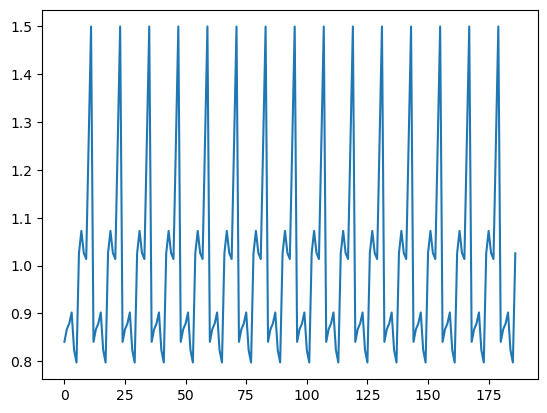

In [88]:
#visualising Seasonal component
df_seasonal_decompose.seasonal.plot()

<AxesSubplot:>

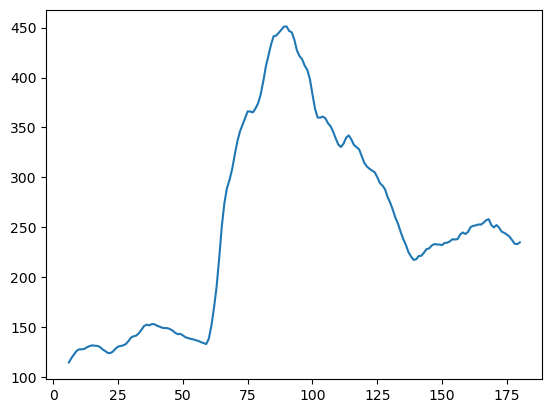

In [89]:
#visualising trend component
df_seasonal_decompose.trend.plot()

<AxesSubplot:>

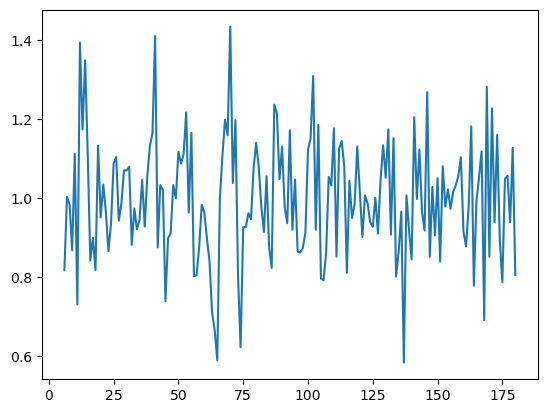

In [93]:
#visualising residual component
df_seasonal_decompose.resid.plot()

In [54]:
df['Year']=pd.DatetimeIndex(df['YearMonth']).year
df['Month']=pd.DatetimeIndex(df['YearMonth']).month
df

,YearMonth,Shoe_Sales,Year,Month
0,1980-01,85,1980,1
1,1980-02,89,1980,2
2,1980-03,109,1980,3
3,1980-04,95,1980,4
4,1980-05,91,1980,5
...,...,...,...,...
182,1995-03,188,1995,3
183,1995-04,195,1995,4
184,1995-05,189,1995,5
185,1995-06,220,1995,6


<AxesSubplot:title={'center':'Shoe Sales'}, xlabel='Year'>

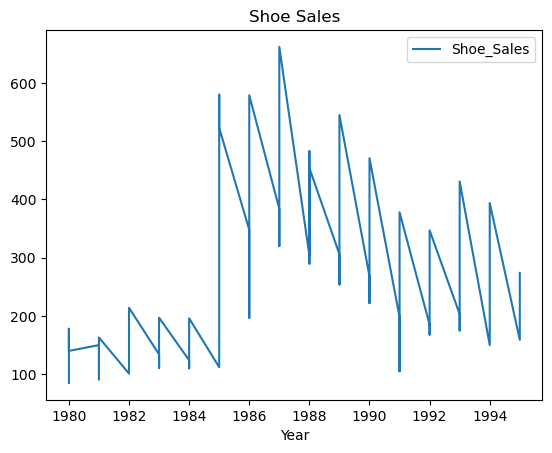

In [55]:
df.plot(x='Year',y='Shoe_Sales',title="Shoe Sales")

This graph is different as this is only plotting all the  value per year in one line.

In [56]:
df[['Year','Shoe_Sales']]

,Year,Shoe_Sales
0,1980,85
1,1980,89
2,1980,109
3,1980,95
4,1980,91
...,...,...
182,1995,188
183,1995,195
184,1995,189
185,1995,220
